# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     904.3
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           6.97e-41
Time:                        10:32:47   Log-Likelihood:               -0.21234
No. Observations:                  50   AIC:                             8.425
Df Residuals:                      46   BIC:                             16.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9877      0.086     57.760      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.46598     4.91727596  5.33516843  5.69755252  5.99030087  6.20958477
  6.36250315  6.46591629  6.54367572  6.62270545  6.72857848  6.88131517
  7.092094    7.36141497  7.67901742  8.02556586  8.37582672  8.70281418
  8.9822238   9.19642576  9.33736132  9.40786687  9.42120793  9.39889964
  9.36717192  9.35265992  9.37802799  9.45824593  9.59812957  9.79154949
 10.02243807 10.26742937 10.4996981  10.69336689 10.82775792 10.89079021
 10.88096448 10.80760949 10.68934934 10.55104361 10.41970295 10.32005136
 10.27046409 10.27994861 10.34666476 10.45822702 10.59373949 10.72722896
 10.83191226 10.88459669]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.8559398  10.7178589  10.48626011 10.1973915   9.89896829  9.63849046
  9.45161316  9.35341704  9.33471601  9.36430628]


## Plot comparison

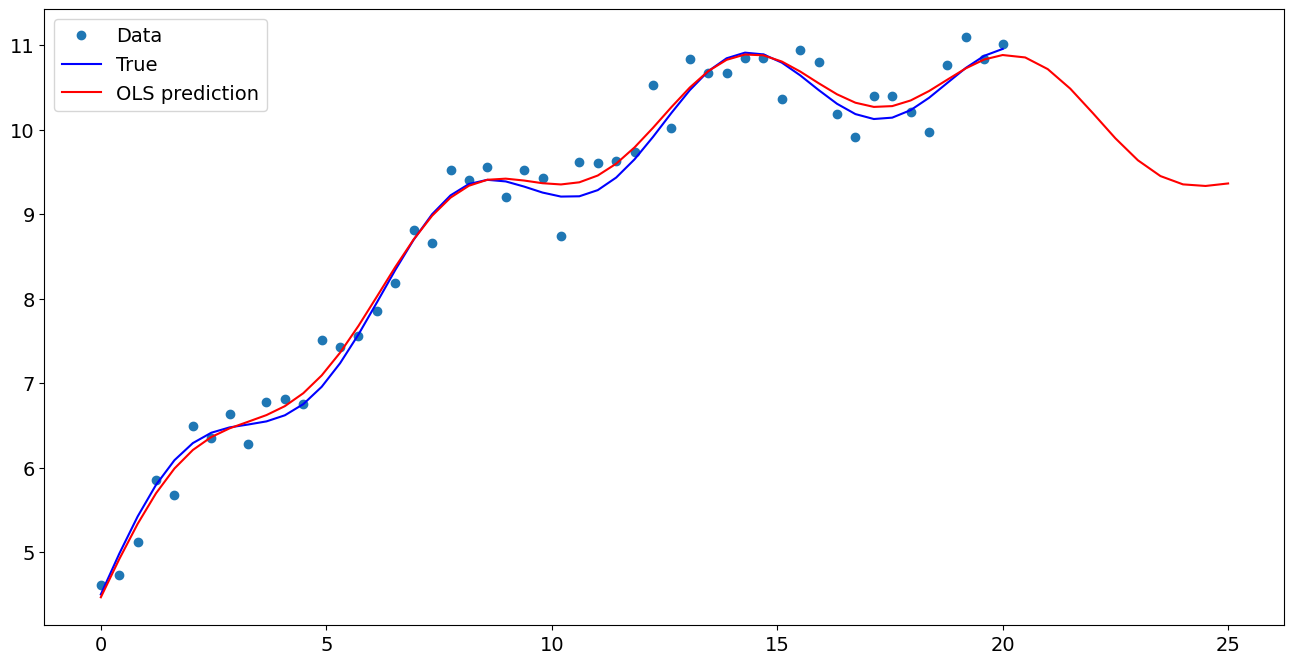

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.987660
x1                  0.511088
np.sin(x1)          0.405601
I((x1 - 5) ** 2)   -0.020867
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.855940
1    10.717859
2    10.486260
3    10.197392
4     9.898968
5     9.638490
6     9.451613
7     9.353417
8     9.334716
9     9.364306
dtype: float64